In [ ]:
#importing basic libraries
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score , roc_curve, auc, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import os
import statistics
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#loading the dataset
data = pd.read_csv("/content/Borrower_Payment_History.csv")

In [ ]:
pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data

CustomerID                                LoanID DateReported  \
0               1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
1               1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
2               1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
3               1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
4               1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
...           ...                                   ...          ...   
36995        1000  801fda65-b954-4fd2-830e-2a66f3066d29      22:33.0   
36996        1000  801fda65-b954-4fd2-830e-2a66f3066d29      22:33.0   
36997        1000  801fda65-b954-4fd2-830e-2a66f3066d29      22:33.0   
36998        1000  801fda65-b954-4fd2-830e-2a66f3066d29      22:33.0   
36999        1000  801fda65-b954-4fd2-830e-2a66f3066d29      22:33.0   

      YearMonthReported  InstallmentAmount  TotalOutstandingBalance  \
0               2021-06           13411.52                482814.85   
1               2021-07           13411.52                469403.33   
2               2021-08           13411.52                455991.80   
3               2021-09           13411.52                442580.28   
4               2021-10           13411.52                429168.76   
...                 ...                ...                      ...   
36995           2024-02            6576.96                 46038.75   
36996           2024-03            6576.96                 39461.78   
36997           2024-04            6576.96                 32884.82   
36998           2024-05            6576.96                     0.00   
36999           2024-06            6576.96                 -6576.96   

       OverdueAmount  DPDStatus LoanStatus  SanctionAmount  InterestRate  \
0               0.00          1       OPEN          438126         10.20   
1               0.00          1       OPEN          438126         10.20   
2               0.00          1       OPEN          438126         10.20   
3               0.00          1       OPEN          438126         10.20   
4               0.00          1       OPEN          438126         10.20   
...              ...        ...        ...             ...           ...   
36995       26307.85          5       OPEN          215540          9.85   
36996       26307.85          5       OPEN          215540          9.85   
36997       26307.85          5       OPEN          215540          9.85   
36998           0.00          1      CLOSE          215540          9.85   
36999           0.00          1       OPEN          215540          9.85   

       LoanTerm         LoanType  Income EmploymentStatus  No_of_days_past_due  
0            36  Housing Finance   51967         Employed                    0  
1            36  Housing Finance   51967         Employed                    0  
2            36  Housing Finance   51967         Employed                    0  
3            36  Housing Finance   51967         Employed                    0  
4            36  Housing Finance   51967         Employed                    0  
...         ...              ...     ...              ...                  ...  
36995        36  Housing Finance   44393         Employed                   95  
36996        36  Housing Finance   44393         Employed                   95  
36997        36  Housing Finance   44393         Employed                   95  
36998        36  Housing Finance   44393         Employed                    0  
36999        36  Housing Finance   44393         Employed                    0  

[37000 rows x 16 columns]

In [ ]:
#checking the total unique loans
len(np.unique(data['CustomerID']))

1000

In [ ]:
#number of loans is equal to the number of customers . Let us check if there is any other customer having two different loans
len(np.unique(data.groupby(['CustomerID'])[['LoanID']].apply(lambda x:x)))

1000

In [ ]:
#ok now this confirms that each customer has only 1 loan. Now lets check some categorical columns in the data


In [ ]:
data[data['EmploymentStatus' ] != 'Employed']

CustomerID                                LoanID DateReported  \
74              3  7d205b3e-e42c-43b4-b5c5-cc8659562b77      22:27.1   
75              3  7d205b3e-e42c-43b4-b5c5-cc8659562b77      22:27.1   
76              3  7d205b3e-e42c-43b4-b5c5-cc8659562b77      22:27.1   
77              3  7d205b3e-e42c-43b4-b5c5-cc8659562b77      22:27.1   
78              3  7d205b3e-e42c-43b4-b5c5-cc8659562b77      22:27.1   
...           ...                                   ...          ...   
36810         995  5eb21112-6470-4184-869c-c8075a09f9bd      22:33.0   
36811         995  5eb21112-6470-4184-869c-c8075a09f9bd      22:33.0   
36812         995  5eb21112-6470-4184-869c-c8075a09f9bd      22:33.0   
36813         995  5eb21112-6470-4184-869c-c8075a09f9bd      22:33.0   
36814         995  5eb21112-6470-4184-869c-c8075a09f9bd      22:33.0   

      YearMonthReported  InstallmentAmount  TotalOutstandingBalance  \
74              2021-06             5285.1                190263.57   
75              2021-07             5285.1                184978.47   
76              2021-08             5285.1                179693.37   
77              2021-09             5285.1                174408.27   
78              2021-10             5285.1                169123.17   
...                 ...                ...                      ...   
36810           2024-02             6601.8                 33009.00   
36811           2024-03             6601.8                 26407.20   
36812           2024-04             6601.8                 19805.40   
36813           2024-05             6601.8                 13203.60   
36814           2024-06             6601.8                  6601.80   

       OverdueAmount  DPDStatus LoanStatus  SanctionAmount  InterestRate  \
74               0.0          1       OPEN          182175          4.44   
75               0.0          1       OPEN          182175          4.44   
76               0.0          1       OPEN          182175          4.44   
77               0.0          1       OPEN          182175          4.44   
78               0.0          1       OPEN          182175          4.44   
...              ...        ...        ...             ...           ...   
36810            0.0          1       OPEN          225232          5.52   
36811            0.0          1       OPEN          225232          5.52   
36812            0.0          1       OPEN          225232          5.52   
36813            0.0          1       OPEN          225232          5.52   
36814            0.0          1       OPEN          225232          5.52   

       LoanTerm     LoanType  Income EmploymentStatus  No_of_days_past_due  
74           36  Charge Card   34196       Unemployed                    0  
75           36  Charge Card   34196       Unemployed                    0  
76           36  Charge Card   34196       Unemployed                    0  
77           36  Charge Card   34196       Unemployed                    0  
78           36  Charge Card   34196       Unemployed                    0  
...         ...          ...     ...              ...                  ...  
36810        36  Credit Card  105407       Unemployed                    0  
36811        36  Credit Card  105407       Unemployed                    0  
36812        36  Credit Card  105407       Unemployed                    0  
36813        36  Credit Card  105407       Unemployed                    0  
36814        36  Credit Card  105407       Unemployed                    0  

[11063 rows x 16 columns]

In [ ]:
#seems each customer is employed , so let's drop this column

data = data.drop('EmploymentStatus', axis=1)

In [ ]:
np.unique(data['LoanType'])

array(['Business Loan', 'Charge Card', 'Consumer Finance', 'Credit Card',
       'Housing Finance'], dtype=object)

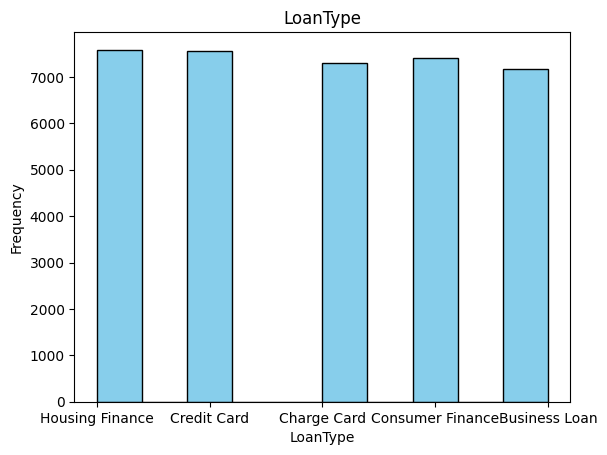

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data['LoanType'], bins=10, color='skyblue', edgecolor='black')
plt.title('LoanType')
plt.xlabel('LoanType')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#so the loan type is almost equally distributed
#let's group the data according to loan type and check the no of past due for them

data.groupby(['LoanType'])[['No_of_days_past_due']].max()

No_of_days_past_due
LoanType                             
Business Loan                      95
Charge Card                        95
Consumer Finance                   95
Credit Card                        95
Housing Finance                    95

In [ ]:
data.groupby(['LoanType'])[['No_of_days_past_due']].min()

No_of_days_past_due
LoanType                             
Business Loan                       0
Charge Card                         0
Consumer Finance                    0
Credit Card                         0
Housing Finance                     0

In [ ]:
data.groupby(['LoanType'])[['No_of_days_past_due']].mean()

No_of_days_past_due
LoanType                             
Business Loan               12.902619
Charge Card                 13.397585
Consumer Finance            12.579054
Credit Card                 13.154478
Housing Finance             13.303230

In [ ]:
#this means every loan type has customers having No_of_days_past_due greater than 90 and the mean for each of them is almost same

#Now , lets check an another column, LoanTerm

data[data['LoanTerm'] != 36]

Empty DataFrame
Columns: [CustomerID, LoanID, DateReported, YearMonthReported, InstallmentAmount, TotalOutstandingBalance, OverdueAmount, DPDStatus, LoanStatus, SanctionAmount, InterestRate, LoanTerm, LoanType, Income, No_of_days_past_due]
Index: []

In [ ]:
#this means there is no variation in loan term, let's drop it

data = data.drop('LoanTerm', axis=1)

In [ ]:
#now let's check the count of row for each customer id
data.groupby('CustomerID').count()

LoanID  DateReported  YearMonthReported  InstallmentAmount  \
CustomerID                                                               
1               37            37                 37                 37   
2               37            37                 37                 37   
3               37            37                 37                 37   
4               37            37                 37                 37   
5               37            37                 37                 37   
...            ...           ...                ...                ...   
996             37            37                 37                 37   
997             37            37                 37                 37   
998             37            37                 37                 37   
999             37            37                 37                 37   
1000            37            37                 37                 37   

            TotalOutstandingBalance  OverdueAmount  DPDStatus  LoanStatus  \
CustomerID                                                                  
1                                37             37         37          37   
2                                37             37         37          37   
3                                37             37         37          37   
4                                37             37         37          37   
5                                37             37         37          37   
...                             ...            ...        ...         ...   
996                              37             37         37          37   
997                              37             37         37          37   
998                              37             37         37          37   
999                              37             37         37          37   
1000                             37             37         37          37   

            SanctionAmount  InterestRate  LoanType  Income  \
CustomerID                                                   
1                       37            37        37      37   
2                       37            37        37      37   
3                       37            37        37      37   
4                       37            37        37      37   
5                       37            37        37      37   
...                    ...           ...       ...     ...   
996                     37            37        37      37   
997                     37            37        37      37   
998                     37            37        37      37   
999                     37            37        37      37   
1000                    37            37        37      37   

            No_of_days_past_due  
CustomerID                       
1                            37  
2                            37  
3                            37  
4                            37  
5                            37  
...                         ...  
996                          37  
997                          37  
998                          37  
999                          37  
1000                         37  

[1000 rows x 13 columns]

In [ ]:
#it seems all the customer has 37 rows . But let's be sure of it
data_count= data.groupby('CustomerID').count()

In [ ]:
data_count.shape[0] * 37 == data.shape[0]

True

In [ ]:
pd.set_option('display.max_rows', 100)

In [ ]:
#ok, that means each customer has 37 entries
data.head(37)

CustomerID                                LoanID DateReported  \
0            1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
1            1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
2            1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
3            1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
4            1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
5            1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
6            1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
7            1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
8            1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
9            1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
10           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
11           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
12           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
13           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
14           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
15           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
16           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
17           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
18           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
19           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
20           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
21           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
22           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
23           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
24           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
25           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
26           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
27           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
28           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
29           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
30           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
31           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
32           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
33           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
34           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
35           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   
36           1  d5cbc0b8-b8a9-43b0-b482-abec237835b6      22:27.1   

   YearMonthReported  InstallmentAmount  TotalOutstandingBalance  \
0            2021-06           13411.52                482814.85   
1            2021-07           13411.52                469403.33   
2            2021-08           13411.52                455991.80   
3            2021-09           13411.52                442580.28   
4            2021-10           13411.52                429168.76   
5            2021-11           13411.52                415757.23   
6            2021-12           13411.52                402345.71   
7            2022-01           13411.52                388934.19   
8            2022-02           13411.52                375522.66   
9            2022-03           13411.52                362111.14   
10           2022-04           13411.52                348699.62   
11           2022-05           13411.52                348699.62   
12           2022-06           13411.52                321876.57   
13           2022-07           13411.52                308465.04   
14           2022-08           13411.52                295053.52   
15           2022-09           13411.52                281642.00   
16           2022-10           13411.52                281642.00   
17           2022-11           13411.52                281642.00   
18           2022-12           13411.52                281642.00   
19           2023-01 

In [ ]:
data[data['CustomerID']==2]

CustomerID                                LoanID DateReported  \
37           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
38           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
39           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
40           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
41           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
42           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
43           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
44           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
45           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
46           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
47           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
48           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
49           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
50           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
51           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
52           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
53           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
54           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
55           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
56           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
57           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
58           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
59           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
60           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
61           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
62           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
63           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
64           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
65           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
66           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
67           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
68           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
69           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
70           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
71           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
72           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   
73           2  6ce62227-bb89-47ef-80ae-c38f46d779c6      22:27.1   

   YearMonthReported  InstallmentAmount  TotalOutstandingBalance  \
37           2021-06             5930.2                213487.16   
38           2021-07             5930.2                207556.97   
39           2021-08             5930.2                213487.16   
40           2021-09             5930.2                213487.16   
41           2021-10             5930.2                213487.16   
42           2021-11             5930.2                213487.16   
43           2021-12             5930.2                183836.17   
44           2022-01             5930.2                177905.97   
45           2022-02             5930.2                171975.77   
46           2022-03             5930.2                166045.57   
47           2022-04             5930.2                160115.37   
48           2022-05             5930.2                154185.17   
49           2022-06             5930.2                148254.98   
50           2022-07             5930.2                142324.78   
51           2022-08             5930.2                142324.78   
52           2022-09             5930.2                130464.38   
53           2022-10             5930.2                124534.18   
54           2022-11             5930.2                118603.98   
55           2022-12             5930.2                112673.78   
56           2023-01 

In [ ]:
#looking at different customers , we can infer that the columns LoanID	DateReported	YearMonthReported	are of no use and we can drop them

data.drop(['LoanID'	,'DateReported'], axis=1, inplace=True	)

In [ ]:
data['YearMonthReported'] = data['YearMonthReported'].astype('string')

In [ ]:
data[['year', 'month']] = data['YearMonthReported'].str.split('-', expand=True)

In [ ]:
data['year'] = data['year'].astype(int)

In [ ]:
data['month'] = data['month'].astype(int)

In [ ]:
data.drop('YearMonthReported', axis=1, inplace=True)

In [ ]:
data_grop = data.groupby('month')['DPDStatus'].value_counts().unstack(fill_value=0)

<Axes: xlabel='month'>

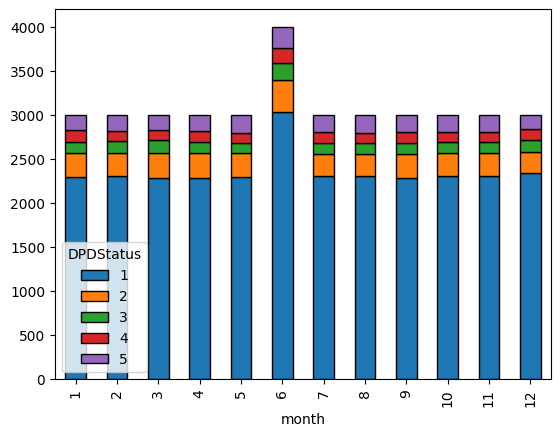

In [ ]:
data_grop.plot(kind='bar', stacked=True,  edgecolor='black')

In [ ]:
#by looking at the above histogram plot, it seems each month has equally distributed DPDStatus
#the 6th month has the highest data. This might be because 6th month might be occuring the highest . We can check that by :
data.groupby('month').count()

CustomerID  InstallmentAmount  TotalOutstandingBalance  OverdueAmount  \
month                                                                          
1            3000               3000                     3000           3000   
2            3000               3000                     3000           3000   
3            3000               3000                     3000           3000   
4            3000               3000                     3000           3000   
5            3000               3000                     3000           3000   
6            4000               4000                     4000           4000   
7            3000               3000                     3000           3000   
8            3000               3000                     3000           3000   
9            3000               3000                     3000           3000   
10           3000               3000                     3000           3000   
11           3000               3000                     3000           3000   
12           3000               3000                     3000           3000   

       DPDStatus  LoanStatus  SanctionAmount  InterestRate  LoanType  Income  \
month                                                                          
1           3000        3000            3000          3000      3000    3000   
2           3000        3000            3000          3000      3000    3000   
3           3000        3000            3000          3000      3000    3000   
4           3000        3000            3000          3000      3000    3000   
5           3000        3000            3000          3000      3000    3000   
6           4000        4000            4000          4000      4000    4000   
7           3000        3000            3000          3000      3000    3000   
8           3000        3000            3000          3000      3000    3000   
9           3000        3000            3000          3000      3000    3000   
10          3000        3000            3000          3000      3000    3000   
11          3000        3000            3000          3000      3000    3000   
12          3000        3000            3000          3000      3000    3000   

       No_of_days_past_due  year  
month                             
1                     3000  3000  
2                     3000  3000  
3                     3000  3000  
4                     3000  3000  
5                     3000  3000  
6                     4000  4000  
7                     3000  3000  
8                     3000  3000  
9                     3000  3000  
10                    3000  3000  
11                    3000  3000  
12                    3000  3000

<Axes: xlabel='year'>

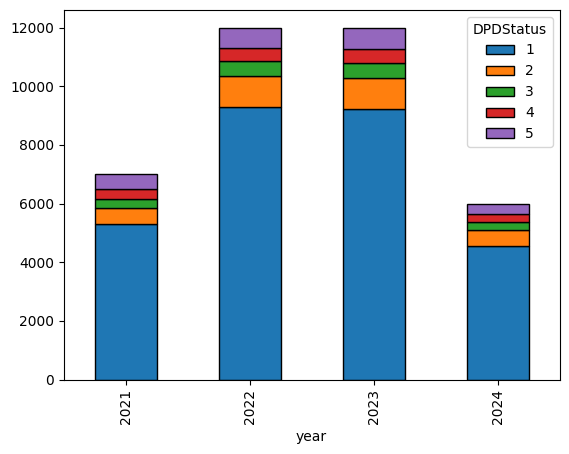

In [ ]:
#let's do the same for year
data_grop_year = data.groupby('year')['DPDStatus'].value_counts().unstack(fill_value=0)
data_grop_year.plot(kind='bar', stacked=True,  edgecolor='black')

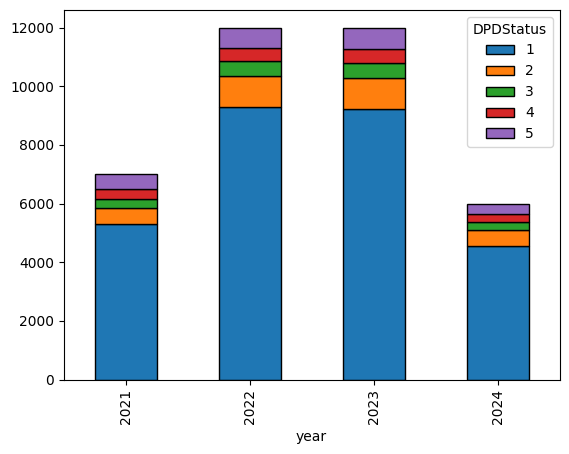

In [ ]:
ax = data_grop_year.plot(kind='bar', stacked=True, edgecolor='black')

In [ ]:
data_grp_customerID = data.groupby('CustomerID')['DPDStatus'].value_counts().unstack(fill_value=0)

In [ ]:
data_grp_customerID[data_grp_customerID[5]==0].value_counts().sum()

253

In [ ]:
data_grp_customerID

DPDStatus    1  2  3  4  5
CustomerID                
1           27  4  1  1  4
2           28  3  2  2  2
3           31  6  0  0  0
4           17  4  2  5  9
5           24  3  2  2  6
...         .. .. .. .. ..
996         31  5  1  0  0
997         28  5  1  2  1
998         23  3  3  4  4
999         26  3  1  3  4
1000        21  4  3  3  6

[1000 rows x 5 columns]

In [ ]:
merged_df = pd.merge(data, data_grp_customerID, on='CustomerID', how='inner')

In [ ]:
merged_df[merged_df[5] == 0][merged_df['DPDStatus'] == 4]

CustomerID  InstallmentAmount  TotalOutstandingBalance  OverdueAmount  \
2515           68            5512.23                 16536.68       16536.68   
9138          247            5919.36                 17758.07       17758.07   
15724         425            6927.62                 20782.85       20782.85   
15946         431            9462.95                 28388.86       28388.86   
17537         474           14777.72                 44333.15       44333.15   
17870         483            3507.89                 10523.67       10523.67   
20163         545           11905.17                 47620.67       35715.50   
20164         545           11905.17                 35715.50       35715.50   
22125         598            5404.61                 16213.82       16213.82   
23272         629            9635.92                 28907.76       28907.76   
24270         656           10098.55                 50492.74       30295.64   
24271         656           10098.55                 40394.19       30295.64   
25418         687           12245.15                 36735.46       36735.46   
29894         808            5332.46                 21329.85       15997.39   
29895         808            5332.46                 15997.39       15997.39   
31190         843            6393.82                 25575.27       19181.45   

       DPDStatus LoanStatus  SanctionAmount  InterestRate          LoanType  \
2515           4       OPEN          185788          6.81       Credit Card   
9138           4       OPEN          187999         13.35     Business Loan   
15724          4       OPEN          220099         13.31       Charge Card   
15946          4       OPEN          330231          3.16   Housing Finance   
17537          4       OPEN          494238          7.64     Business Loan   
17870          4       OPEN          111342         13.42  Consumer Finance   
20163          4       OPEN          402013          6.61       Charge Card   
20164          4       OPEN          402013          6.61       Charge Card   
22125          4       OPEN          184510          5.45       Credit Card   
23272          4       OPEN          319511          8.57   Housing Finance   
24270          4       OPEN          335438          8.38       Charge Card   
24271          4       OPEN          335438          8.38       Charge Card   
25418          4       OPEN          394510         11.74   Housing Finance   
29894          4       OPEN          173633         10.56   Housing Finance   
29895          4       OPEN          173633         10.56   Housing Finance   
31190          4       OPEN          212380          8.38   Housing Finance   

       Income  No_of_days_past_due  year  month   1  2  3  4  5  
2515    30929                   75  2024      6  31  3  2  1  0  
9138   110161                   75  2024      6  33  2  1  1  0  
15724   85881                   75  2024      6  30  5  1  1  0  
15946  122085                   75  2024      6  33  2  1  1  0  
17537   91568                   75  2024      6  31  4  1  1  0  
17870   99440                   75  2024      6  32  3  1  1  0  
20163  105272                   75  2024      5  33  1  1  2  0  
20164  105272                   75  2024      6  33  1  1  2  0  
22125   71628                   75  2024      6  30  5  1  1  0  
23272   67455                   75  2024      6  30  3  3  1  0  
24270   63081                   75  2024      5  26  8  1  2  0  
24271   63081                   75  2024      6  26  8  1  2  0  
25418  140569                   75  2024      6  32  1  3  1  0  
29894  100574                   75  2024      5  31  2  2  2  0  
29895  100574                   75  2024      6  31  2  2  2  0  
31190   62355                   75  2024      6  30  5  1  1  0

In [ ]:
merged_df['isdefaulterinNext12'] = np.nan

In [ ]:
for i in range(0, 37000, 37):
    for j in range(i,i+25,1):
        defaulter = False
        for k in range(j,j+12, 1):

            if merged_df.iloc[k]['DPDStatus'] == 5 :
                merged_df.at[j,'isdefaulterinNext12'] = 1
                break
            else:
                merged_df.at[j,'isdefaulterinNext12'] = 0


In [ ]:
merged_df.iloc[27]['isdefaulterinNext12']

nan

In [ ]:
merged_df.isna().value_counts()

CustomerID  InstallmentAmount  TotalOutstandingBalance  OverdueAmount  DPDStatus  LoanStatus  SanctionAmount  InterestRate  LoanType  Income  No_of_days_past_due  year   month  1      2      3      4      5      isdefaulterinNext12
False       False              False                    False          False      False       False           False         False     False   False                False  False  False  False  False  False  False  False                  25000
                                                                                                                                                                                                                    True                   12000
Name: count, dtype: int64

In [ ]:
merged_df = merged_df.dropna()

In [ ]:
merged_df = merged_df.drop([1,2,3,4], axis=1)

In [ ]:
merged_df=merged_df.rename(columns={5: 'NoOfDefaultTimes'})

In [ ]:
merged_df['isdefaulterinNext12'] = merged_df['isdefaulterinNext12'].astype(int)

In [ ]:
merged_df=pd.get_dummies(merged_df, columns=['LoanType'])

In [ ]:
merged_df[merged_df['LoanStatus'] != 'OPEN']

Empty DataFrame
Columns: [CustomerID, InstallmentAmount, TotalOutstandingBalance, OverdueAmount, DPDStatus, LoanStatus, SanctionAmount, InterestRate, Income, No_of_days_past_due, year, month, NoOfDefaultTimes, isdefaulterinNext12, LoanType_Business Loan, LoanType_Charge Card, LoanType_Consumer Finance, LoanType_Credit Card, LoanType_Housing Finance]
Index: []

In [ ]:
merged_df = merged_df.drop('LoanStatus', axis=1)

In [ ]:
boolean_columns = merged_df.select_dtypes(include=['bool'])

In [ ]:
boolean_columns.columns

Index(['LoanType_Business Loan', 'LoanType_Charge Card',
       'LoanType_Consumer Finance', 'LoanType_Credit Card',
       'LoanType_Housing Finance'],
      dtype='object')

In [ ]:
merged_df[boolean_columns.columns] = merged_df[boolean_columns.columns].astype(int)

In [ ]:
merged_df

CustomerID  InstallmentAmount  TotalOutstandingBalance  OverdueAmount  \
0               1           13411.52                482814.85           0.00   
1               1           13411.52                469403.33           0.00   
2               1           13411.52                455991.80           0.00   
3               1           13411.52                442580.28           0.00   
4               1           13411.52                429168.76           0.00   
...           ...                ...                      ...            ...   
36983        1000            6576.96                124962.31       26307.85   
36984        1000            6576.96                 92077.49           0.00   
36985        1000            6576.96                 85500.53           0.00   
36986        1000            6576.96                 78923.56           0.00   
36987        1000            6576.96                 72346.60           0.00   

       DPDStatus  SanctionAmount  InterestRate  Income  No_of_days_past_due  \
0              1          438126         10.20   51967                    0   
1              1          438126         10.20   51967                    0   
2              1          438126         10.20   51967                    0   
3              1          438126         10.20   51967                    0   
4              1          438126         10.20   51967                    0   
...          ...             ...           ...     ...                  ...   
36983          5          215540          9.85   44393                   95   
36984          1          215540          9.85   44393                    0   
36985          1          215540          9.85   44393                    0   
36986          1          215540          9.85   44393                    0   
36987          1          215540          9.85   44393                    0   

       year  month  NoOfDefaultTimes  isdefaulterinNext12  \
0      2021      6                 4                    0   
1      2021      7                 4                    0   
2      2021      8                 4                    0   
3      2021      9                 4                    0   
4      2021     10                 4                    0   
...     ...    ...               ...                  ...   
36983  2023      2                 6                    1   
36984  2023      3                 6                    1   
36985  2023      4                 6                    1   
36986  2023      5                 6                    1   
36987  2023      6                 6                    1   

       LoanType_Business Loan  LoanType_Charge Card  \
0                           0                     0   
1                           0                     0   
2                           0                     0   
3                           0                     0   
4                           0                     0   
...                       ...                   ...   
36983                       0                     0   
36984                       0                     0   
36985                       0                     0   
36986                       0                     0   
36987                       0                     0   

       LoanType_Consumer Finance  LoanType_Credit Card  \
0                              0                     0   
1                              0                     0   
2                              0                     0   
3                              0                     0   
4                              0                     0   
...                          ...                   ...   
36983                          0                     0   
36984                          0                     0   
36985                          0                     0   
36986                          0                     0   
36987                          0                     0   

      

In [ ]:
X = merged_df.drop('isdefaulterinNext12', axis=1)
y = merged_df['isdefaulterinNext12']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.1 MB/s eta 0:00:00


In [ ]:
from xgboost import XGBRegressor

In [ ]:
my_model = XGBRegressor()

In [ ]:
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
predictions = my_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))


Mean Absolute Error : 0.18740477607760694


In [ ]:
predictions

array([ 1.0233133 ,  0.17668104,  0.8180653 , ...,  0.13668355,
        0.13763139, -0.02906923], dtype=float32)

In [ ]:
#converting the probabilities to binary predictions
binary_predictions = [1 if p >= 0.5 else 0 for p in predictions]

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(binary_predictions, y_test)))


Mean Absolute Error : 0.0878


In [ ]:
conf_matrix = confusion_matrix(y_test, binary_predictions)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[3063  140]
 [ 299 1498]]


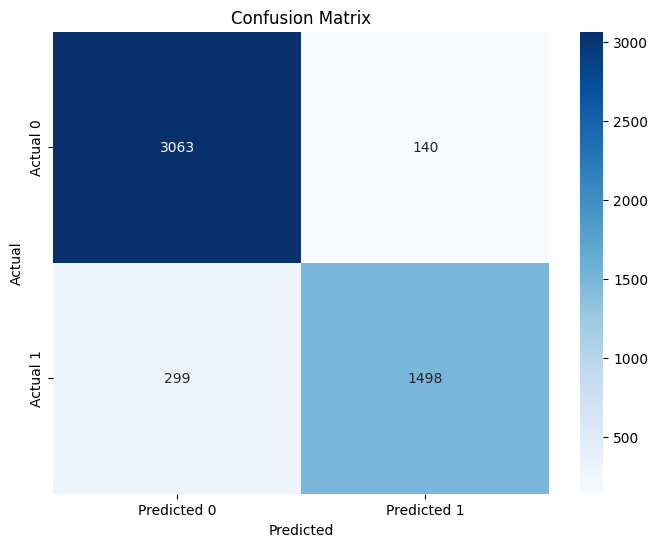

In [ ]:
# Plotting the confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
TN, FP, FN, TP = conf_matrix.ravel()

In [ ]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
f1_score_value = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f'Accuracy: {accuracy:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1_score_value:.2f}')

Accuracy: 0.91
Recall: 0.83
F1 Score: 0.87
